# Introduction

In [1]:
# importing libraries
import os
import sys

sys.path.append("../")
from utils.predictor import GhanaRainfallPredictor

In [2]:
# 1. Instantiate the class
predictor_class = GhanaRainfallPredictor()

Dataset loaded Successfully
Shape: (10928, 12)

Columns: ['ID', 'user_id', 'confidence', 'predicted_intensity', 'community', 'district', 'prediction_time', 'indicator', 'indicator_description', 'time_observed', 'Target', 'forecast_length']
            ID  user_id  confidence  predicted_intensity community  \
0  ID_KwcTp_12       11         0.3                  0.0    Tumfa    
1  ID_K9vWT_12       17         0.3                  0.0  Kwabeng    
2  ID_AIQg3_12       19         0.3                  0.0  Akropong   
3  ID_px4yf_12       23         0.3                  0.0   Asamama   
4  ID_QYYmK_12       23         0.3                  0.0   Asamama   

     district      prediction_time indicator indicator_description  \
0  atiwa_west  2025-05-30 11:09:33       NaN                   NaN   
1  atiwa_west  2025-05-30 11:09:35       NaN                   NaN   
2  atiwa_west  2025-05-30 11:09:47       NaN                   NaN   
3  atiwa_west  2025-05-30 11:16:33       NaN               

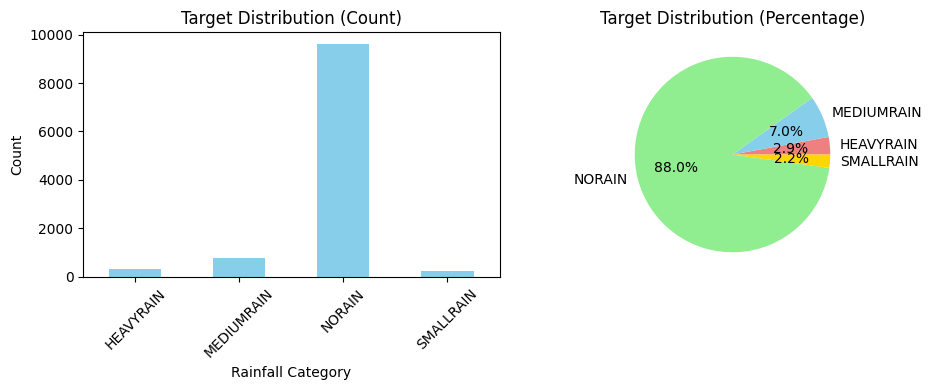


CATEGORICAL COLUMNS ANALYSIS

INDICATOR:
  Unique values: 10
  Non-null values: 503
  Top values:
    clouds: 266 (52.9%)
    sun: 90 (17.9%)
    heat: 53 (10.5%)
    fog: 27 (5.4%)
    wind: 25 (5.0%)
    moon: 19 (3.8%)
    dew: 9 (1.8%)
    star: 8 (1.6%)
    thunder: 4 (0.8%)
    lightning: 2 (0.4%)

COMMUNITY:
  Unique values: 38
  Non-null values: 10,928

DISTRICT:
  Unique values: 3
  Non-null values: 10,928
  Top values:
    atiwa_west: 4,877 (44.6%)
    assin_fosu: 4,815 (44.1%)
    obuasi_east: 1,236 (11.3%)

 FARMER PARTICIPATION ANALYSIS
Total farmers: 43
Average submissions per farmer: 254.1
Most active farmer: 1333 submissions
Farmers with 1 submission: 1
Farmers with 10+ submissions: 38

COMMUNITY COVERAGE
Total communities: 38
Top 5 communities by submissions:
  Akwaduuso: 1,427 (13.1%)
  FOSO ODUMASI : 1,179 (10.8%)
  Asamama: 1,139 (10.4%)
  Assin nyankomasi : 853 (7.8%)
  Akropong : 668 (6.1%)

TEMPORAL PATTERNS
Time range: 2025-05-30 11:09:33 to 2025-07-20 19:23:03

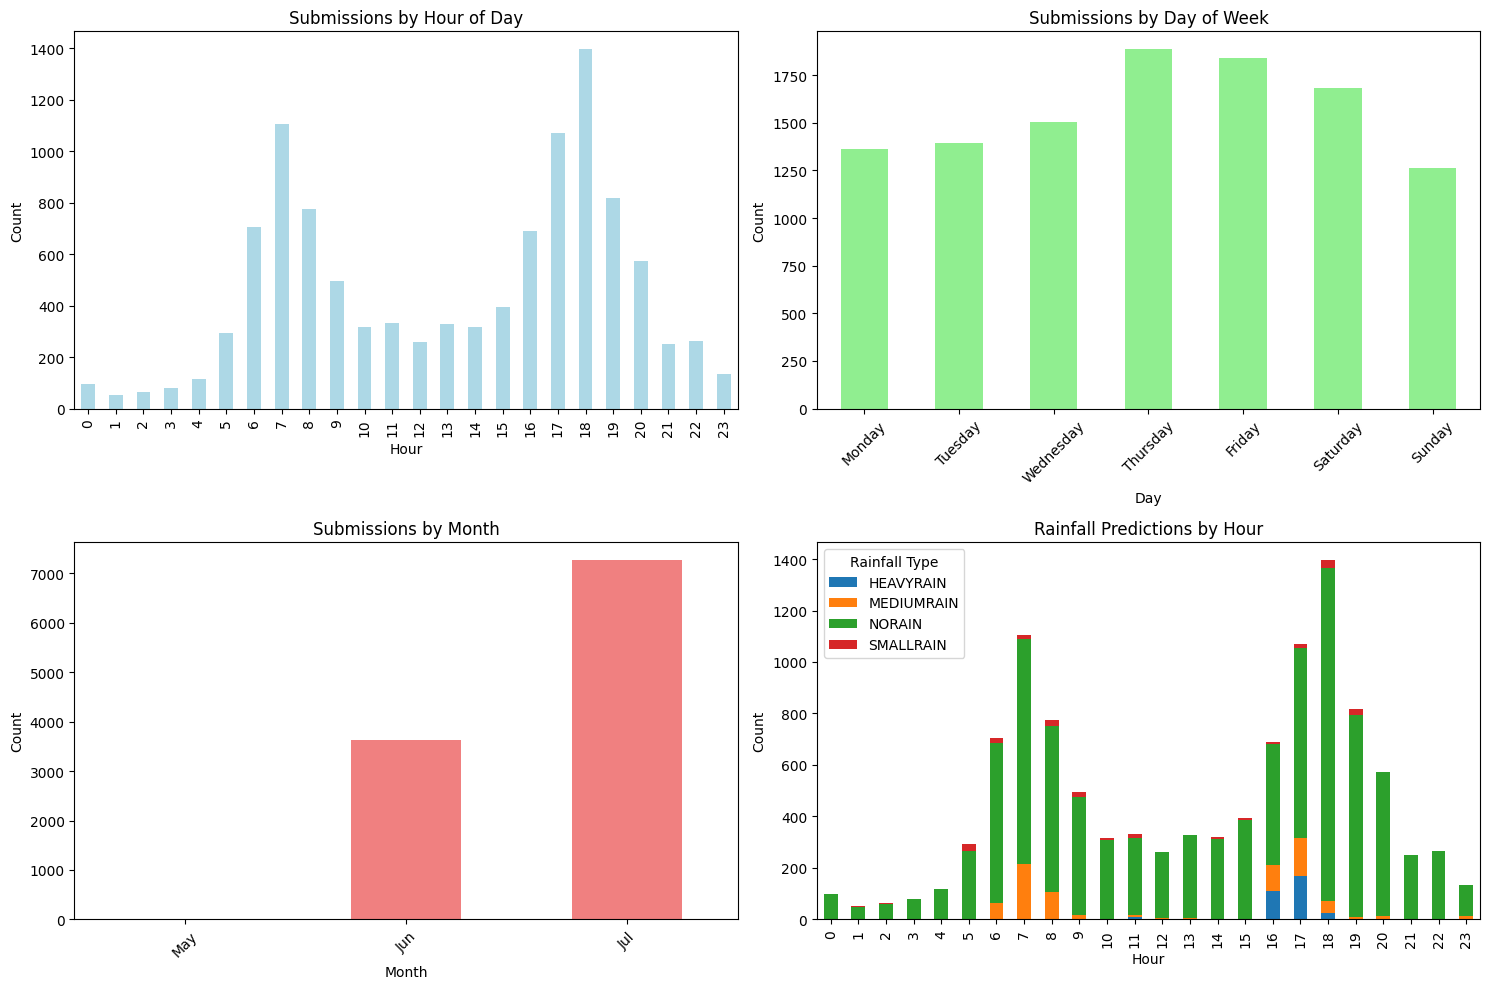


 SAMPLE DATA
First 3 rows:
            ID  user_id  confidence  predicted_intensity community  \
0  ID_KwcTp_12       11         0.3                  0.0    Tumfa    
1  ID_K9vWT_12       17         0.3                  0.0  Kwabeng    
2  ID_AIQg3_12       19         0.3                  0.0  Akropong   

     district      prediction_time indicator indicator_description  \
0  atiwa_west  2025-05-30 11:09:33       NaN                   NaN   
1  atiwa_west  2025-05-30 11:09:35       NaN                   NaN   
2  atiwa_west  2025-05-30 11:09:47       NaN                   NaN   

  time_observed      Target  forecast_length  
0           NaN  MEDIUMRAIN               12  
1           NaN   HEAVYRAIN               12  
2           NaN  MEDIUMRAIN               12  

Data exploration completed!
Summary: 10,928 records from 38 communities


In [3]:
# 2. Loading data and Explore the dataset
df = predictor_class.load_and_explore_dta('../data/train.csv')

In [4]:
# 3. Preprocess the data
predictor_class.preprocess_data(df)

=== Preprocess Ghana Rainfall Data ===
Dropping indicator:  95.4% missing values
Dropping indicator_description:  96.8% missing values
Dropping time_observed:  99.3% missing values
After dropping sparse columns:
Categorical features (5): ['community', 'district', 'Target', 'day_of_week', 'month']
Numerical features   (13): ['farmer_experience_level', 'community_avg_confidence', 'district_avg_confidence', 'predicted_intensity', 'confidence', 'is_weekend', 'is_experienced_farmer', 'forecast_length', 'hour', 'is_morning', 'is_afternoon', 'is_evening', 'is_night']


,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,Target,forecast_length,hour,...,month,is_weekend,is_morning,is_afternoon,is_evening,is_night,farmer_experience_level,is_experienced_farmer,community_avg_confidence,district_avg_confidence
0,ID_KwcTp_12,11,0.3,0.00,Tumfa,atiwa_west,2025-05-30 11:09:33,MEDIUMRAIN,12,11,...,5,0,1,0,0,0,55,0,0.563636,0.481259
1,ID_K9vWT_12,17,0.3,0.00,Kwabeng,atiwa_west,2025-05-30 11:09:35,HEAVYRAIN,12,11,...,5,0,1,0,0,0,153,0,0.708637,0.481259
2,ID_AIQg3_12,19,0.3,0.00,Akropong,atiwa_west,2025-05-30 11:09:47,MEDIUMRAIN,12,11,...,5,0,1,0,0,0,100,0,0.582641,0.481259
3,ID_px4yf_12,23,0.3,0.00,Asamama,atiwa_west,2025-05-30 11:16:33,HEAVYRAIN,12,11,...,5,0,1,0,0,0,1130,1,0.303073,0.481259
4,ID_QYYmK_12,23,0.3,0.00,Asamama,atiwa_west,2025-05-30 11:16:55,HEAVYRAIN,12,11,...,5,0,1,0,0,0,1130,1,0.303073,0.481259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10923,ID_GSbJj_24,18,0.3,0.00,Akwaduuso,assin_fosu,2025-07-20 19:13:17,NORAIN,24,19,...,7,0,0,0,1,0,1333,1,0.304625,0.573022
10924,ID_h8Ny4_24,18,0.3,0.00,Akwaduuso,assin_fosu,2025-07-20 19:13:19,NORAIN,24,19,...,7,0,0,0,1,0,1333,1,0.304625,0.573022
10925,ID_90CwG_24,18,0.3,0.00,Akwaduuso,assin_fosu,2025-07-20 19:13:21,NORAIN,24,19,...,7,0,0,0,1,0,1333,1,0.304625,0.573022
10926,ID_GAaTk_24,57,0.6,0.33,Assin Aponsie,assin_fosu,2025-07-20 19:18:39,NORAIN,24,19,...,7,0,0,0,1,0,169,0,0.347337,0.573022
